In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.model_selection import train_test_split
import re

In [18]:
heart_disease_df = pd.read_csv('/Users/mky/Desktop/ml project summer 2025/heart_disease_health_indicators_BRFSS2015.csv',  encoding='utf-8')
print(heart_disease_df.shape)
heart_disease_df.head()

(253680, 22)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [19]:
# Count the number of 0s and 1s in the 'HeartDiseaseorAttack' column
print(heart_disease_df['HeartDiseaseorAttack'].value_counts())

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


In [20]:
# Use regex to match any case variant of 'nan' (e.g., 'NaN', 'NAN', 'nan') as a string
nan_string_mask = heart_disease_df.applymap(
    lambda x: isinstance(x, str) and bool(pd.Series(x).str.contains(r'^nan$', case=False, regex=True).values[0])
)

# Count how many such string 'nan' values in each column
nan_string_counts = nan_string_mask.sum()
nan_string_counts = nan_string_counts[nan_string_counts > 0]

# Display the result
print(" Columns containing the string 'nan' (case-insensitive):")
print(nan_string_counts)


/var/folders/86/yt7z0g3j3xbds04jw0_x0sqr0000gn/T/ipykernel_62817/108956568.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nan_string_mask = heart_disease_df.applymap(


 Columns containing the string 'nan' (case-insensitive):
Series([], dtype: int64)


In [21]:

# Define common dirty placeholders
dirty_values = ['nan', 'null', 'na', 'missing', '-', '--', 'n/a']
pattern = r'^(' + '|'.join(map(re.escape, dirty_values)) + r')$'

# Check for dirty strings (case-insensitive)
dirty_mask = heart_disease_df.applymap(
    lambda x: isinstance(x, str) and bool(re.match(pattern, x.strip(), re.IGNORECASE))
)

# Count dirty string cells in each column
dirty_counts = dirty_mask.sum()
dirty_counts = dirty_counts[dirty_counts > 0]

print(" Columns containing dirty/missing string values (case-insensitive):")
print(dirty_counts)


/var/folders/86/yt7z0g3j3xbds04jw0_x0sqr0000gn/T/ipykernel_62817/717969998.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dirty_mask = heart_disease_df.applymap(


 Columns containing dirty/missing string values (case-insensitive):
Series([], dtype: int64)


In [22]:
# Check for duplicate rows
duplicates = heart_disease_df.duplicated()

# Count total duplicate rows
total_duplicates = duplicates.sum()

print(f" Total duplicate rows: {total_duplicates}")

# Show actual duplicate rows (if any)
if total_duplicates > 0:
    print("\n Duplicate rows:")
    print(heart_disease_df[duplicates])
else:
    print(" No duplicate rows found.")

 Total duplicate rows: 23899

 Duplicate rows:
        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
1242                     0.0     1.0       1.0        1.0  27.0     1.0   
1563                     0.0     0.0       0.0        1.0  21.0     1.0   
2700                     0.0     0.0       0.0        1.0  32.0     0.0   
3160                     0.0     0.0       0.0        1.0  21.0     0.0   
3332                     0.0     0.0       0.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253492                   0.0     1.0       1.0        1.0  33.0     0.0   
253550                   0.0     0.0       0.0        1.0  25.0     0.0   
253563                   0.0     0.0       1.0        1.0  24.0     1.0   
253597                   0.0     0.0       0.0        1.0  24.0     0.0   
253638                   0.0     0.0       0.0        1.0  24.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ... 

In [23]:
# Remove duplicate rows and keep only the first occurrence
heart_disease_df_cleaned = heart_disease_df.drop_duplicates()

# Optional: check new shape and confirm removal
print("After removing duplicates:")
print(f"Original shape: {heart_disease_df.shape}")
print(f"New shape: {heart_disease_df_cleaned.shape}")


After removing duplicates:
Original shape: (253680, 22)
New shape: (229781, 22)


In [8]:
# Count the number of 0s and 1s in the 'HeartDiseaseorAttack' column
print(heart_disease_df_cleaned['HeartDiseaseorAttack'].value_counts())

HeartDiseaseorAttack
0.0    206064
1.0     23717
Name: count, dtype: int64


In [24]:
heart_disease_df_cleaned .info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   Diabetes              229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  MentH

In [138]:
heart_disease_df_cleaned.to_csv('heart_disease_df_cleaned.csv', index=False)
print("✅ File 'heart_disease_df_cleaned.csv' saved in your project folder.")


✅ File 'heart_disease_df_cleaned.csv' saved in your project folder.


In [49]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# === Step 1: Define X and y
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 2.5: Print Class Distribution (Full and Training Set)
print("\n📊 Class Distribution in Full Dataset:")
class_counts_full = y.value_counts()
print(class_counts_full)
print(f"Majority Class: {class_counts_full.idxmax()} with {class_counts_full.max()} samples")
print(f"Minority Class: {class_counts_full.idxmin()} with {class_counts_full.min()} samples")

print("\n📊 Class Distribution in Training Set:")
class_counts_train = y_train.value_counts()
print(class_counts_train)
print(f"Majority Class: {class_counts_train.idxmax()} with {class_counts_train.max()} samples")
print(f"Minority Class: {class_counts_train.idxmin()} with {class_counts_train.min()} samples")

# === Step 3: Build Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42))
])

# === Step 4: Define Hyperparameter Grid
param_grid = {
    'clf__learning_rate': ['constant', 'optimal', 'invscaling'],
    'clf__eta0': [0.01, 0.001, 0.0001],  # Initial learning rate
    'clf__alpha': [0.01, 0.001, 0.0001]  # Regularization strength
}

# === Step 5: Grid Search with 5-Fold CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)


# === Step 6: Best Model Info
print("\n Best Hyperparameters:")
print(grid_search.best_params_)

print("\n Best Cross-Validated F1 Score:")
print(grid_search.best_score_)

# === Step 7: Test Set Evaluation
y_pred = grid_search.predict(X_test)
print("\n Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# === Step 8: Optional - Visualize Grid Search Results
# Convert results to DataFrame
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Show top 5 results sorted by mean test F1 score
top_results = cv_results_df.sort_values(by="mean_test_score", ascending=False).head(5)
print("\n Top 5 Hyperparameter Combinations by CV F1 Score:")
print(top_results[["param_clf__learning_rate", "param_clf__eta0", "param_clf__alpha", "mean_test_score"]])



📊 Class Distribution in Full Dataset:
HeartDiseaseorAttack
0.0    206064
1.0     23717
Name: count, dtype: int64
Majority Class: 0.0 with 206064 samples
Minority Class: 1.0 with 23717 samples

📊 Class Distribution in Training Set:
HeartDiseaseorAttack
0.0    164850
1.0     18974
Name: count, dtype: int64
Majority Class: 0.0 with 164850 samples
Minority Class: 1.0 with 18974 samples
Fitting 5 folds for each of 27 candidates, totalling 135 fits

 Best Hyperparameters:
{'clf__alpha': 0.0001, 'clf__eta0': 0.0001, 'clf__learning_rate': 'invscaling'}

 Best Cross-Validated F1 Score:
0.36076704093878914

 Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     41214
         1.0       0.36      0.35      0.36      4743

    accuracy                           0.87     45957
   macro avg       0.64      0.64      0.64     45957
weighted avg       0.87      0.87      0.87     45957


 Top 5 Hyperparameter Combina

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# === Step 1: Define X and y
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 2: Report Full Dataset Distribution
print("\n📊 Class Distribution in Full Dataset:")
print(y.value_counts())
print(f"Majority Class: {y.value_counts().idxmax()} with {y.value_counts().max()} samples")
print(f"Minority Class: {y.value_counts().idxmin()} with {y.value_counts().min()} samples")

# === Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 4: Save Class Distribution BEFORE Oversampling
y_train_before_resample = y_train.copy()
print("\n📊 Class Distribution in Training Set (Before Oversampling):")
print(y_train_before_resample.value_counts())
print(f"Majority Class: {y_train_before_resample.value_counts().idxmax()} with {y_train_before_resample.value_counts().max()} samples")
print(f"Minority Class: {y_train_before_resample.value_counts().idxmin()} with {y_train_before_resample.value_counts().min()} samples")

print("\n📊 Class Distribution in Test Set (Unchanged):")
print(y_test.value_counts())
print(f"Majority Class: {y_test.value_counts().idxmax()} with {y_test.value_counts().max()} samples")
print(f"Minority Class: {y_test.value_counts().idxmin()} with {y_test.value_counts().min()} samples")

# === Step 5: Manual Oversampling on Training Set Only
train_df = pd.concat([X_train, y_train], axis=1)
df_majority = train_df[train_df["HeartDiseaseorAttack"] == 0.0]
df_minority = train_df[train_df["HeartDiseaseorAttack"] == 1.0]

# Set ratio of majority to minority (1 means perfect balance)
desired_ratio = 1
n_minority_needed = desired_ratio * len(df_majority) - len(df_minority)
df_minority_oversampled = df_minority.sample(n=n_minority_needed, replace=True, random_state=42)

# Combine and shuffle
train_balanced = pd.concat([df_majority, df_minority, df_minority_oversampled])
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Update training sets
X_train = train_balanced.drop(columns=["HeartDiseaseorAttack"])
y_train = train_balanced["HeartDiseaseorAttack"]

print("\n📊 Class Distribution in Training Set (After Oversampling):")
print(y_train.value_counts())
print(f"Majority Class: {y_train.value_counts().idxmax()} with {y_train.value_counts().max()} samples")
print(f"Minority Class: {y_train.value_counts().idxmin()} with {y_train.value_counts().min()} samples")

# === Step 6: Build Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42))
])

# === Step 7: Define Hyperparameter Grid
param_grid = {
    'clf__learning_rate': ['constant', 'optimal', 'invscaling'],
    'clf__eta0': [0.01, 0.001, 0.0001],
    'clf__alpha': [0.01, 0.001, 0.0001]
}

# === Step 8: Grid Search with 5-Fold CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

# === Step 9: Best Model Info
print("\n✅ Best Hyperparameters:")
print(grid_search.best_params_)

print("\n✅ Best Cross-Validated F1 Score:")
print(grid_search.best_score_)

# === Step 10: Test Set Evaluation
y_pred = grid_search.predict(X_test)
print("\n📊 Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# === Step 11: Top 5 Grid Search Results
cv_results_df = pd.DataFrame(grid_search.cv_results_)
top_results = cv_results_df.sort_values(by="mean_test_score", ascending=False).head(5)
print("\n🏆 Top 5 Hyperparameter Combinations by CV F1 Score:")
print(top_results[["param_clf__learning_rate", "param_clf__eta0", "param_clf__alpha", "mean_test_score"]])



📊 Class Distribution in Full Dataset:
HeartDiseaseorAttack
0.0    206064
1.0     23717
Name: count, dtype: int64
Majority Class: 0.0 with 206064 samples
Minority Class: 1.0 with 23717 samples

📊 Class Distribution in Training Set (Before Oversampling):
HeartDiseaseorAttack
0.0    164850
1.0     18974
Name: count, dtype: int64
Majority Class: 0.0 with 164850 samples
Minority Class: 1.0 with 18974 samples

📊 Class Distribution in Test Set (Unchanged):
HeartDiseaseorAttack
0.0    41214
1.0     4743
Name: count, dtype: int64
Majority Class: 0.0 with 41214 samples
Minority Class: 1.0 with 4743 samples

📊 Class Distribution in Training Set (After Oversampling):
HeartDiseaseorAttack
0.0    164850
1.0    164850
Name: count, dtype: int64
Majority Class: 0.0 with 164850 samples
Minority Class: 0.0 with 164850 samples
Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Best Hyperparameters:
{'clf__alpha': 0.01, 'clf__eta0': 0.01, 'clf__learning_rate': 'constant'}

✅ Best Cross-Valid

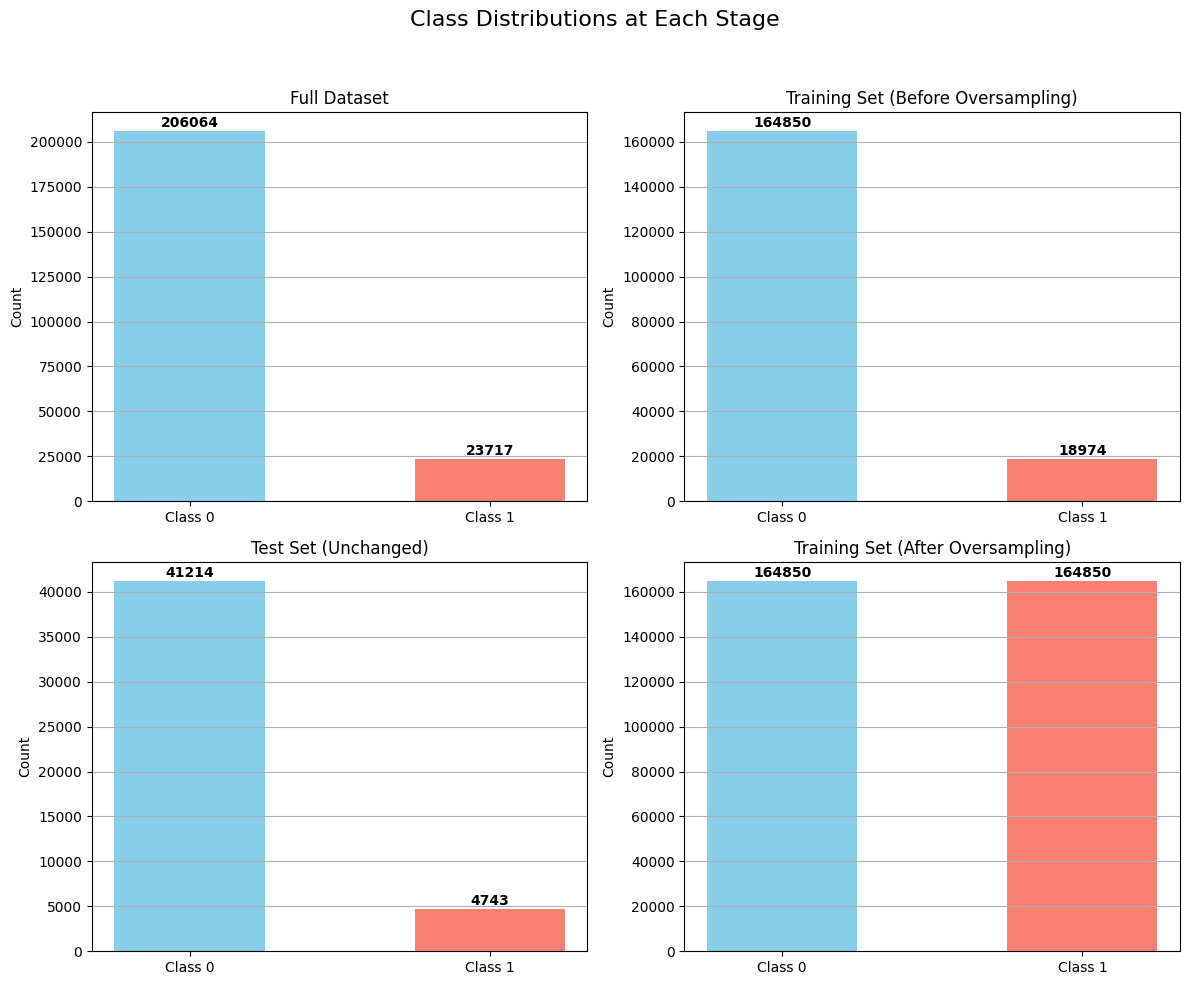

In [93]:
import matplotlib.pyplot as plt

# Sample class distributions
dist_full = [206064, 23717]
dist_train_before = [164850, 18974]
dist_test = [41214, 4743]
dist_train_after = [164850, 164850]

labels = ['Class 0', 'Class 1']
datasets = [
    ("Full Dataset", dist_full),
    ("Training Set (Before Oversampling)", dist_train_before),
    ("Test Set (Unchanged)", dist_test),
    ("Training Set (After Oversampling)", dist_train_after)
]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Class Distributions at Each Stage", fontsize=16)

for ax, (title, dist) in zip(axes.flatten(), datasets):
    bars = ax.bar(labels, dist, color=['skyblue', 'salmon'], width=0.5)
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.grid(True, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + max(dist)*0.01,
                f"{int(height)}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# === Step 1: Define X and y
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 1.1: Class Distribution in Full Dataset
print("\n📊 Class Distribution in Original Full Dataset:")
print(y.value_counts())
print(f"Majority Class: {y.value_counts().idxmax()} with {y.value_counts().max()} samples")
print(f"Minority Class: {y.value_counts().idxmin()} with {y.value_counts().min()} samples")

# === Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



# 🔄 Save training labels before any resampling
y_train_before_resample = y_train.copy()

# === Step 2.1: Class Distributions After Train-Test Split
print("\n📊 Class Distribution in Training Set (Before Resampling):")
print(y_train.value_counts())
print(f"Majority Class: {y_train.value_counts().idxmax()} with {y_train.value_counts().max()} samples")
print(f"Minority Class: {y_train.value_counts().idxmin()} with {y_train.value_counts().min()} samples")

print("\n📊 Class Distribution in Test Set (Unchanged):")
print(y_test.value_counts())
print(f"Majority Class: {y_test.value_counts().idxmax()} with {y_test.value_counts().max()} samples")
print(f"Minority Class: {y_test.value_counts().idxmin()} with {y_test.value_counts().min()} samples")

# === Step 3: Manual Undersampling on Training Set Only
train_df = pd.concat([X_train, y_train], axis=1)
df_majority = train_df[train_df["HeartDiseaseorAttack"] == 0.0]
df_minority = train_df[train_df["HeartDiseaseorAttack"] == 1.0]

desired_ratio = 1  # Majority:Minority
n_majority_to_keep = desired_ratio * len(df_minority)

df_majority_downsampled = df_majority.sample(n=n_majority_to_keep, random_state=42)
train_balanced = pd.concat([df_minority, df_majority_downsampled])
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Final balanced training set
X_train = train_balanced.drop(columns=["HeartDiseaseorAttack"])
y_train = train_balanced["HeartDiseaseorAttack"]

# === Step 3.1: Class Distribution After Undersampling
print("\n📊 Class Distribution in Training Set (After Undersampling):")
print(y_train.value_counts())
print(f"Majority Class: {y_train.value_counts().idxmax()} with {y_train.value_counts().max()} samples")
print(f"Minority Class: {y_train.value_counts().idxmin()} with {y_train.value_counts().min()} samples")

# === Step 4: Build Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42))
])

# === Step 5: Define Hyperparameter Grid
param_grid = {
    'clf__learning_rate': ['constant', 'optimal', 'invscaling'],
    'clf__eta0': [0.01, 0.001, 0.0001],
    'clf__alpha': [0.01, 0.001, 0.0001]
}

# === Step 6: Grid Search with 5-Fold CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# === Step 7: Train the Model
grid_search.fit(X_train, y_train)

# === Step 8: Best Model Info
print("\n🏆 Best Hyperparameters:")
print(grid_search.best_params_)

print("\n📈 Best Cross-Validated F1 Score:")
print(grid_search.best_score_)

# === Step 9: Evaluate on Test Set
y_pred = grid_search.predict(X_test)
print("\n✅ Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# === Step 10: Visualize Top Grid Search Results
cv_results_df = pd.DataFrame(grid_search.cv_results_)
top_results = cv_results_df.sort_values(by="mean_test_score", ascending=False).head(5)
print("\n🔝 Top 5 Hyperparameter Combinations by CV F1 Score:")
print(top_results[["param_clf__learning_rate", "param_clf__eta0", "param_clf__alpha", "mean_test_score"]])



📊 Class Distribution in Original Full Dataset:
HeartDiseaseorAttack
0.0    206064
1.0     23717
Name: count, dtype: int64
Majority Class: 0.0 with 206064 samples
Minority Class: 1.0 with 23717 samples

📊 Class Distribution in Training Set (Before Resampling):
HeartDiseaseorAttack
0.0    164850
1.0     18974
Name: count, dtype: int64
Majority Class: 0.0 with 164850 samples
Minority Class: 1.0 with 18974 samples

📊 Class Distribution in Test Set (Unchanged):
HeartDiseaseorAttack
0.0    41214
1.0     4743
Name: count, dtype: int64
Majority Class: 0.0 with 41214 samples
Minority Class: 1.0 with 4743 samples

📊 Class Distribution in Training Set (After Undersampling):
HeartDiseaseorAttack
0.0    18974
1.0    18974
Name: count, dtype: int64
Majority Class: 0.0 with 18974 samples
Minority Class: 0.0 with 18974 samples
Fitting 5 folds for each of 27 candidates, totalling 135 fits

🏆 Best Hyperparameters:
{'clf__alpha': 0.001, 'clf__eta0': 0.01, 'clf__learning_rate': 'optimal'}

📈 Best Cross-V

/var/folders/86/yt7z0g3j3xbds04jw0_x0sqr0000gn/T/ipykernel_62817/2013678735.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/mky/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


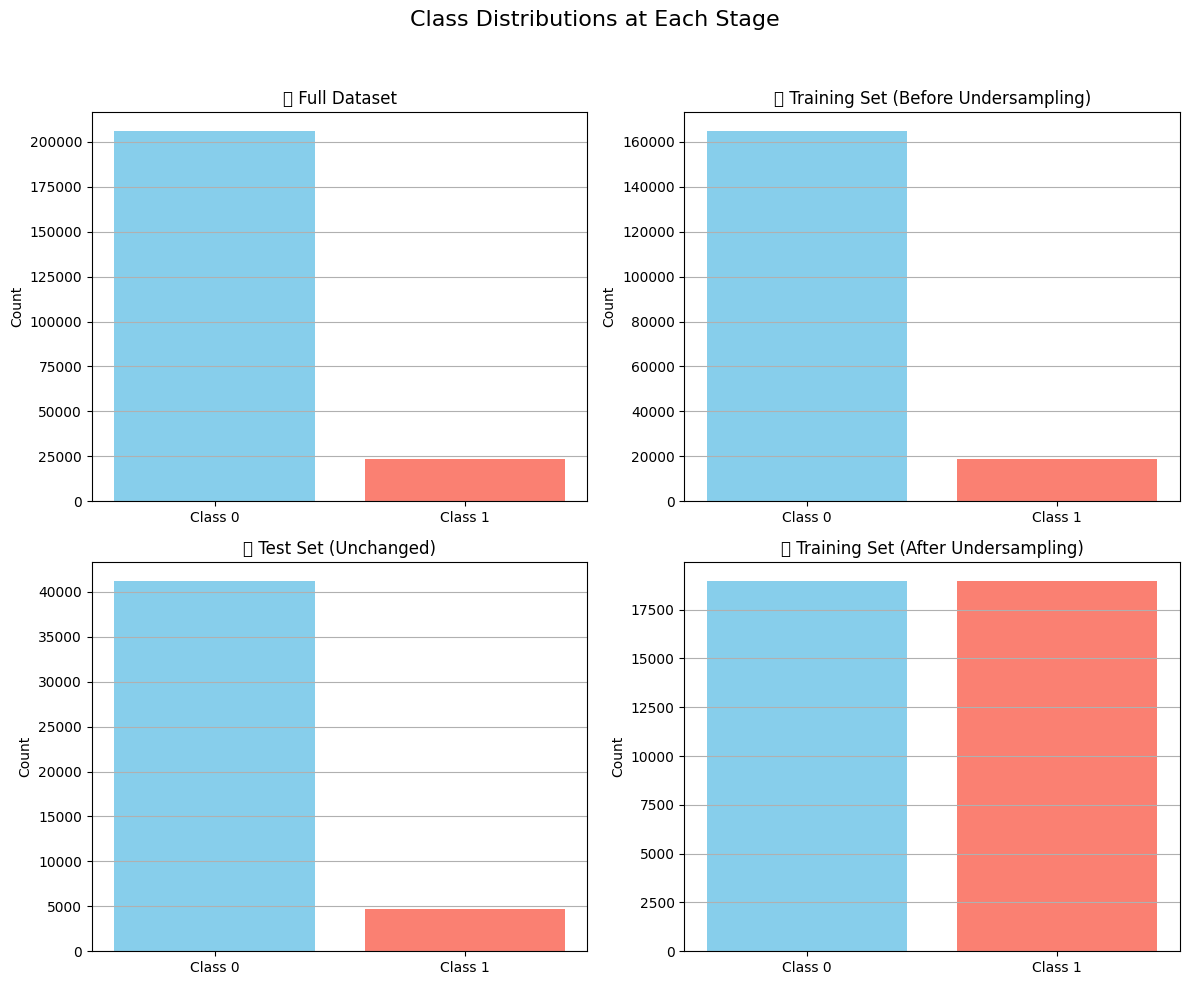

In [75]:
import matplotlib.pyplot as plt


# === Class Distribution Values
dist_full = y.value_counts().sort_index()
dist_train_before = y_train_before_resample.value_counts().sort_index()
dist_test = y_test.value_counts().sort_index()
dist_train_after = y_train.value_counts().sort_index()  # after undersampling

# Helper labels
labels = ['Class 0', 'Class 1']

# === Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Class Distributions at Each Stage", fontsize=16)

# Original Full Dataset
axes[0, 0].bar(labels, dist_full.values, color=['skyblue', 'salmon'])
axes[0, 0].set_title("📊 Full Dataset")
axes[0, 0].set_ylabel("Count")
axes[0, 0].grid(True, axis='y')

# Training Set Before Resampling
axes[0, 1].bar(labels, dist_train_before.values, color=['skyblue', 'salmon'])
axes[0, 1].set_title("📊 Training Set (Before Undersampling)")
axes[0, 1].set_ylabel("Count")
axes[0, 1].grid(True, axis='y')

# Test Set (Unchanged)

axes[1, 0].bar(labels, dist_test.values, color=['skyblue', 'salmon'])
axes[1, 0].set_title("📊 Test Set (Unchanged)")
axes[1, 0].set_ylabel("Count")
axes[1, 0].grid(True, axis='y')

# Training Set After Undersampling
axes[1, 1].bar(labels, dist_train_after.values, color=['skyblue', 'salmon'])
axes[1, 1].set_title("📊 Training Set (After Undersampling)")
axes[1, 1].set_ylabel("Count")
axes[1, 1].grid(True, axis='y')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imblearn pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# === Step 1: Define X and y
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 1.1: Class Distribution in Original Dataset
print("\n📊 Class Distribution in Original Full Dataset:")
print(y.value_counts())
print(f"Majority Class: {y.value_counts().idxmax()} with {y.value_counts().max()} samples")
print(f"Minority Class: {y.value_counts().idxmin()} with {y.value_counts().min()} samples")

# === Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Print Class Distribution BEFORE SMOTE
print("\n📊 Class Distribution BEFORE SMOTE (Train Set):")
print(y_train.value_counts())
print(f"Majority Class: {y_train.value_counts().idxmax()} with {y_train.value_counts().max()} samples")
print(f"Minority Class: {y_train.value_counts().idxmin()} with {y_train.value_counts().min()} samples")

# === Step 4: Create Pipeline with SMOTE + Scaling + Classifier
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42))
])

# === Step 5: Define Hyperparameter Grid
param_grid = {
    'clf__learning_rate': ['constant', 'optimal', 'invscaling'],
    'clf__eta0': [0.01, 0.001, 0.0001],
    'clf__alpha': [0.01, 0.001, 0.0001]
}

# === Step 6: Grid Search with 5-Fold CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# === Step 7: Fit the Model
grid_search.fit(X_train, y_train)

# === Step 8: Print Class Distribution AFTER SMOTE (access from internal SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("\n📊 Class Distribution AFTER SMOTE (Training Data After Resampling):")
print(pd.Series(y_resampled).value_counts())
print(f"Majority Class: {pd.Series(y_resampled).value_counts().idxmax()} with {pd.Series(y_resampled).max()} samples")
print(f"Minority Class: {pd.Series(y_resampled).value_counts().idxmin()} with {pd.Series(y_resampled).min()} samples")

# === Step 9: Evaluate on Test Data
y_pred = grid_search.predict(X_test)
print("\n✅ Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# === Step 10: Best Parameters and Top Results
print("\n🏆 Best Hyperparameters:")
print(grid_search.best_params_)

print("\n📈 Best Cross-Validated F1 Score:")
print(grid_search.best_score_)

# === Step 11: Visualize Grid Search Results
cv_results_df = pd.DataFrame(grid_search.cv_results_)
top_results = cv_results_df.sort_values(by="mean_test_score", ascending=False).head(5)
print("\n🔝 Top 5 Hyperparameter Combinations by CV F1 Score:")
print(top_results[["param_clf__learning_rate", "param_clf__eta0", "param_clf__alpha", "mean_test_score"]])



📊 Class Distribution in Original Full Dataset:
HeartDiseaseorAttack
0.0    206064
1.0     23717
Name: count, dtype: int64
Majority Class: 0.0 with 206064 samples
Minority Class: 1.0 with 23717 samples

📊 Class Distribution BEFORE SMOTE (Train Set):
HeartDiseaseorAttack
0.0    164850
1.0     18974
Name: count, dtype: int64
Majority Class: 0.0 with 164850 samples
Minority Class: 1.0 with 18974 samples
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mky/Library/Python/3.9/lib/python/site-


📊 Class Distribution AFTER SMOTE (Training Data After Resampling):
HeartDiseaseorAttack
0.0    164850
1.0    164850
Name: count, dtype: int64
Majority Class: 0.0 with 1.0 samples
Minority Class: 0.0 with 0.0 samples

✅ Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     41214
         1.0       0.26      0.77      0.38      4743

    accuracy                           0.74     45957
   macro avg       0.61      0.76      0.61     45957
weighted avg       0.89      0.74      0.79     45957


🏆 Best Hyperparameters:
{'clf__alpha': 0.0001, 'clf__eta0': 0.01, 'clf__learning_rate': 'invscaling'}

📈 Best Cross-Validated F1 Score:
0.3849125402527472

🔝 Top 5 Hyperparameter Combinations by CV F1 Score:
   param_clf__learning_rate  param_clf__eta0  param_clf__alpha  \
20               invscaling           0.0100            0.0001   
11               invscaling           0.0100            0.0010   
7         

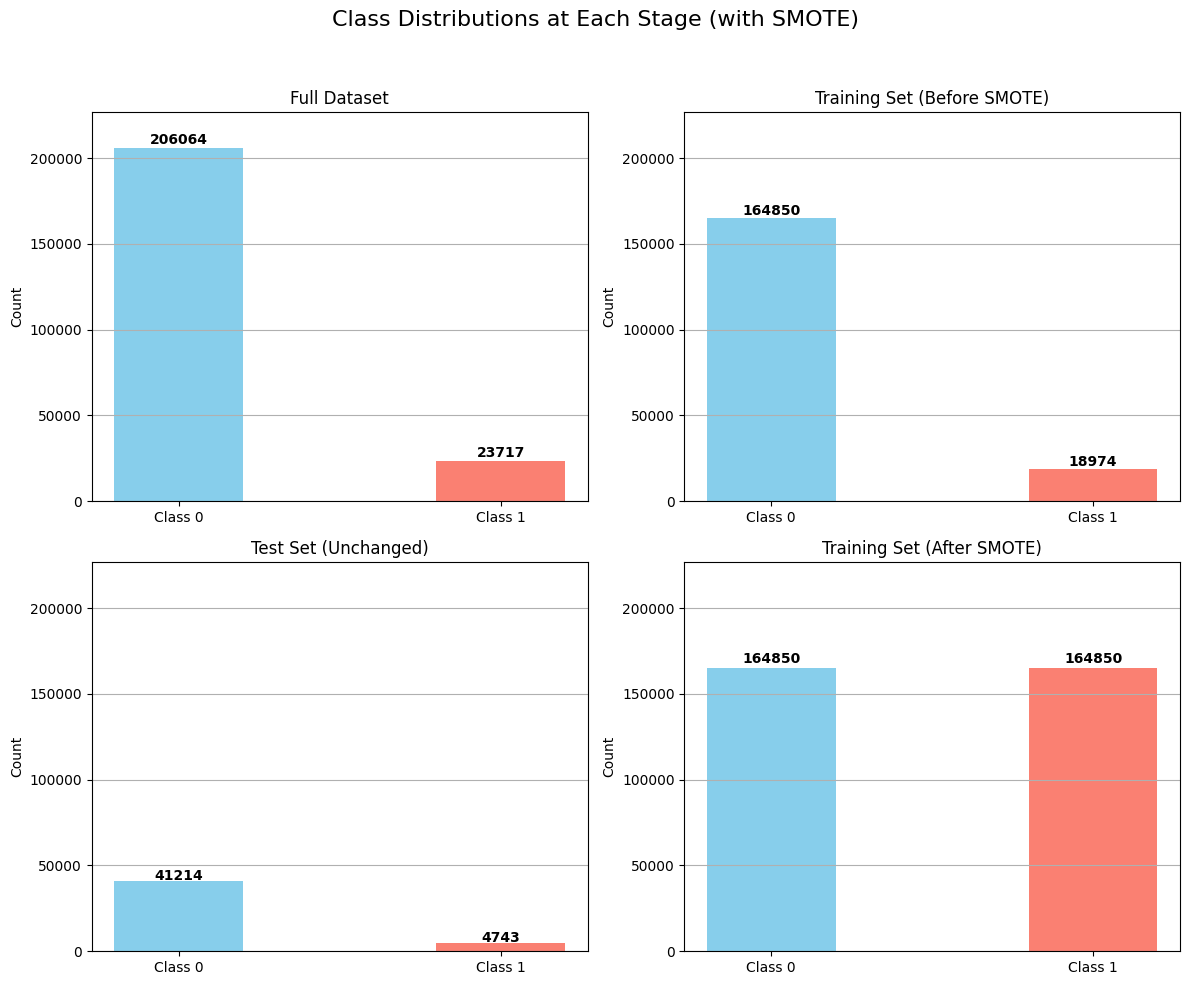

In [94]:
# Redefine class distributions from the SMOTE pipeline context
import pandas as pd

# Simulate class distributions for visualization based on last known context
dist_full = pd.Series({0.0: 206064, 1.0: 23717})
dist_train_before = pd.Series({0.0: 164850, 1.0: 18974})
dist_test = pd.Series({0.0: 41214, 1.0: 4743})
dist_train_after = pd.Series({0.0: 164850, 1.0: 164850})

# Helper labels and data
labels = ['Class 0', 'Class 1']
datasets = [
    ("Full Dataset", dist_full),
    ("Training Set (Before SMOTE)", dist_train_before),
    ("Test Set (Unchanged)", dist_test),
    ("Training Set (After SMOTE)", dist_train_after)
]

# === Plotting ===
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Class Distributions at Each Stage (with SMOTE)", fontsize=16)

for ax, (title, dist) in zip(axes.flatten(), datasets):
    total = dist.sum()
    bars = ax.bar(labels, dist.values, width=0.4, color=['skyblue', 'salmon'])
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.set_ylim(0, max(dist_full.max(), dist_train_after.max()) * 1.1)
    ax.grid(True, axis='y')
    
    # Add count labels on top of bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + total * 0.01, f"{int(height)}",
                ha='center', fontsize=10, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


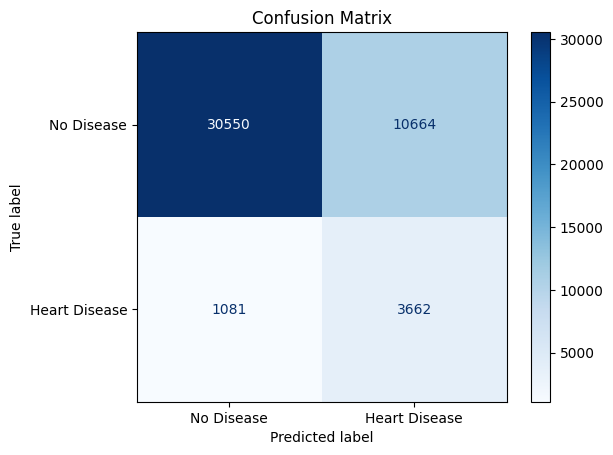


✅ Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     41214
         1.0       0.26      0.77      0.38      4743

    accuracy                           0.74     45957
   macro avg       0.61      0.76      0.61     45957
weighted avg       0.89      0.74      0.79     45957

🔍 Evaluation Metrics:
Precision: 0.2556
Recall:    0.7721
Accuracy:  0.7444


In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# === Step 1: Define X and y
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Build pipeline with best hyperparameters
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(
        loss='log_loss',
        learning_rate='invscaling',
        eta0=0.01,
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42))
])

# === Step 4: Fit the pipeline
pipeline.fit(X_train, y_train)

# === Step 5: Predictions
y_pred = pipeline.predict(X_test)

# === Step 6: Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Disease", "Heart Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

print("🔍 Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Accuracy:  {accuracy:.4f}")


📊 Class Distribution in Original Dataset:
HeartDiseaseorAttack
0.0    206064
1.0     23717
Name: count, dtype: int64
Majority: 0.0, Minority: 1.0

📊 Class Distribution in Training Set BEFORE SMOTE:
HeartDiseaseorAttack
0.0    164850
1.0     18974
Name: count, dtype: int64

📊 Class Distribution in Test Set (Unchanged):
HeartDiseaseorAttack
0.0    41214
1.0     4743
Name: count, dtype: int64


/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



📊 Class Distribution in Training Set AFTER SMOTE:
HeartDiseaseorAttack
0.0    164850
1.0    164850
Name: count, dtype: int64


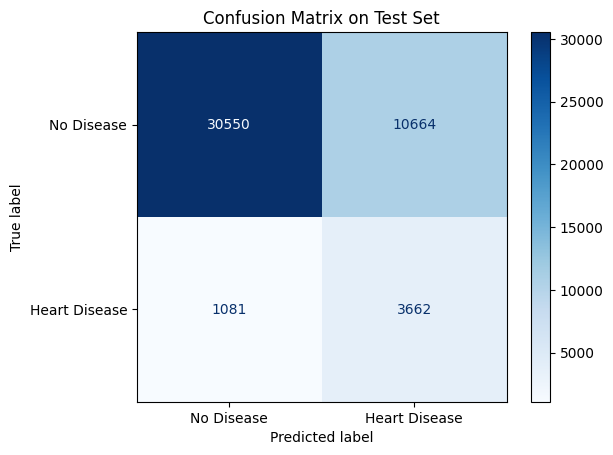


✅ Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     41214
         1.0       0.26      0.77      0.38      4743

    accuracy                           0.74     45957
   macro avg       0.61      0.76      0.61     45957
weighted avg       0.89      0.74      0.79     45957

🔍 Evaluation Metrics:
Precision: 0.2556
Recall:    0.7721
Accuracy:  0.7444


In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    accuracy_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# === Step 1: Define X and y
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 2: Class distribution before split
print("📊 Class Distribution in Original Dataset:")
print(y.value_counts())
print(f"Majority: {y.value_counts().idxmax()}, Minority: {y.value_counts().idxmin()}")

# === Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\n📊 Class Distribution in Training Set BEFORE SMOTE:")
print(y_train.value_counts())
print("\n📊 Class Distribution in Test Set (Unchanged):")
print(y_test.value_counts())

# === Step 4: Manually Apply SMOTE (for monitoring distribution)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n📊 Class Distribution in Training Set AFTER SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# === Step 5: Build and Train Pipeline (with same SMOTE logic)
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # Ensures SMOTE is inside CV
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(
        loss='log_loss',
        learning_rate='invscaling',
        eta0=0.01,
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42))
])

pipeline.fit(X_train, y_train)  # Internally applies SMOTE again

# === Step 6: Predict on Test Data
y_pred = pipeline.predict(X_test)

# === Step 7: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Disease", "Heart Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.grid(False)
plt.show()

# === Step 8: Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\n✅ Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("🔍 Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Accuracy:  {accuracy:.4f}")


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# === Step 1: Define Features and Target
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Build Final Pipeline with Best Params
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', SGDClassifier(
        loss='log_loss',
        learning_rate='invscaling',
        eta0=0.01,
        alpha=0.0001,
        max_iter=1000,
        random_state=42,
        tol=1e-3
    ))
])

# === Step 4: Fit Pipeline
pipeline.fit(X_train, y_train)

# === Step 5: Predict & Evaluate
y_pred = pipeline.predict(X_test)

print("✅ Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


✅ Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     41214
         1.0       0.25      0.78      0.38      4743

    accuracy                           0.74     45957
   macro avg       0.61      0.76      0.61     45957
weighted avg       0.89      0.74      0.79     45957


📊 Confusion Matrix:
[[30187 11027]
 [ 1041  3702]]


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# === Step 1: Define X and y
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Apply SMOTE ONLY on Training Data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("✅ Class distribution before SMOTE:\n", y_train.value_counts())
print("\n✅ Class distribution after SMOTE:\n", y_train_resampled.value_counts())

# === Step 4: Create Pipeline (no SMOTE here)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(
        loss='log_loss',
        learning_rate='invscaling',
        eta0=0.01,
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ))
])

# === Step 5: Train on SMOTE-Resampled Data
pipeline.fit(X_train_resampled, y_train_resampled)

# === Step 6: Evaluate on Original Test Set
y_pred = pipeline.predict(X_test)

print("\n✅ Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


✅ Class distribution before SMOTE:
 HeartDiseaseorAttack
0.0    164850
1.0     18974
Name: count, dtype: int64

✅ Class distribution after SMOTE:
 HeartDiseaseorAttack
0.0    164850
1.0    164850
Name: count, dtype: int64

✅ Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     41214
         1.0       0.26      0.77      0.38      4743

    accuracy                           0.74     45957
   macro avg       0.61      0.76      0.61     45957
weighted avg       0.89      0.74      0.79     45957

📊 Confusion Matrix:
[[30550 10664]
 [ 1081  3662]]


In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE

# === Step 1: Define X and y
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("✅ Class distribution after SMOTE:\n", y_train_resampled.value_counts())

# === Step 4: Build pipeline (without SMOTE)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(
        loss='log_loss',
        learning_rate='invscaling',
        eta0=0.01,
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ))
])

# === Step 5: Fit model
pipeline.fit(X_train_resampled, y_train_resampled)

# === Step 6: Predict probabilities
y_proba = pipeline.predict_proba(X_test)[:, 1]

# === Step 7: Custom threshold
threshold = 0.7
y_pred_adj = (y_proba >= threshold).astype(int)

# === Step 8: Evaluation
print("\n✅ Classification Report with Threshold 0.6:")
print(classification_report(y_test, y_pred_adj))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adj))


/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


✅ Class distribution after SMOTE:
 HeartDiseaseorAttack
0.0    164850
1.0    164850
Name: count, dtype: int64

✅ Classification Report with Threshold 0.6:
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91     41214
         1.0       0.34      0.53      0.42      4743

    accuracy                           0.85     45957
   macro avg       0.64      0.71      0.66     45957
weighted avg       0.88      0.85      0.86     45957


📊 Confusion Matrix:
[[36360  4854]
 [ 2215  2528]]



✅ Max difference between manual and sklearn probabilities: 0.0


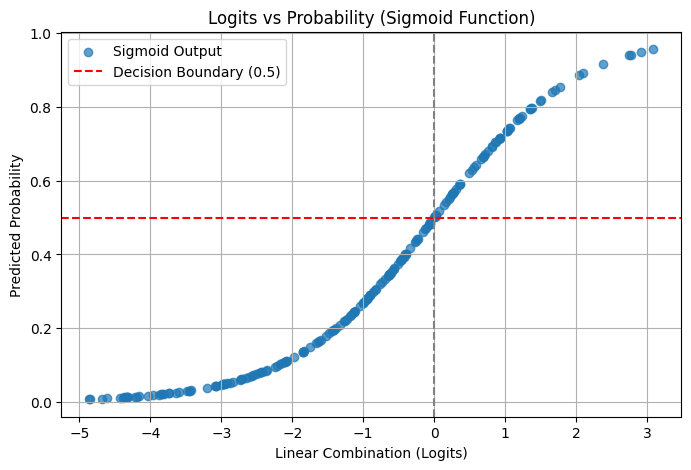

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# === Manually extract scaled features and model
scaler = pipeline.named_steps['scaler']
clf = pipeline.named_steps['clf']

# Scale the test set
X_test_scaled = scaler.transform(X_test)

# === Step 1: Compute the Linear Output (Logits)
logits = np.dot(X_test_scaled, clf.coef_.T) + clf.intercept_  # shape (n_samples, 1)
logits = logits.ravel()

# === Step 2: Apply Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

proba_manual = sigmoid(logits)

# === Step 3: Compare with predict_proba
proba_sklearn = pipeline.predict_proba(X_test)[:, 1]

# === Step 4: Check difference (should be very small)
print("\n✅ Max difference between manual and sklearn probabilities:",
      np.max(np.abs(proba_manual - proba_sklearn)))

# === Step 5: Visualize sigmoid on a sample of points
plt.figure(figsize=(8, 5))
plt.scatter(logits[:200], proba_manual[:200], label='Sigmoid Output', alpha=0.7)
plt.title("Logits vs Probability (Sigmoid Function)")
plt.xlabel("Linear Combination (Logits)")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.show()


/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


✅ Class distribution after SMOTE:
 HeartDiseaseorAttack
0.0    164850
1.0    164850
Name: count, dtype: int64

✅ Classification Report with Custom Threshold = 0.6:
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88     41214
         1.0       0.29      0.67      0.41      4743

    accuracy                           0.80     45957
   macro avg       0.62      0.74      0.64     45957
weighted avg       0.89      0.80      0.83     45957


📊 Confusion Matrix:
[[33632  7582]
 [ 1584  3159]]


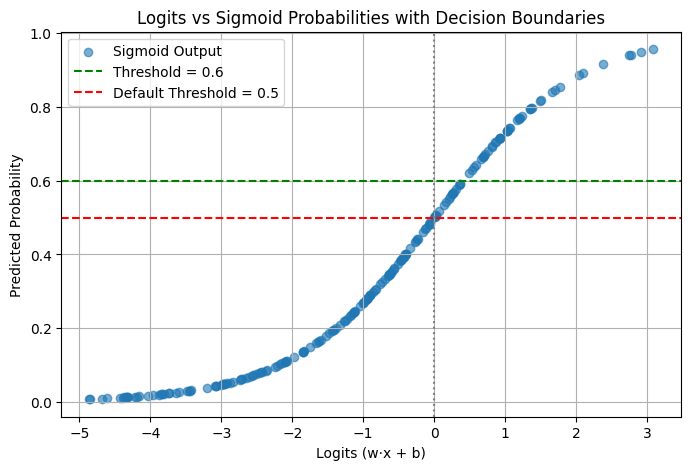

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# === Step 1: Define X and y
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("✅ Class distribution after SMOTE:\n", y_train_resampled.value_counts())

# === Step 4: Build pipeline (no SMOTE in it)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(
        loss='log_loss',
        learning_rate='invscaling',
        eta0=0.01,
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ))
])

# === Step 5: Fit model
pipeline.fit(X_train_resampled, y_train_resampled)

# === Step 6: Extract scaled X_test and model
scaler = pipeline.named_steps['scaler']
clf = pipeline.named_steps['clf']
X_test_scaled = scaler.transform(X_test)

# === Step 7: Compute logits manually
logits = np.dot(X_test_scaled, clf.coef_.T) + clf.intercept_
logits = logits.ravel()

# === Step 8: Apply sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

proba_manual = sigmoid(logits)

# === Step 9: Set custom decision threshold
threshold = 0.6  # <-- you can change this
y_pred_custom = (proba_manual >= threshold).astype(int)

# === Step 10: Evaluate with classification report and confusion matrix
print(f"\n✅ Classification Report with Custom Threshold = {threshold}:")
print(classification_report(y_test, y_pred_custom))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

# === Step 11: Plot sigmoid vs. logits with decision boundary
plt.figure(figsize=(8, 5))
plt.scatter(logits[:200], proba_manual[:200], alpha=0.6, label='Sigmoid Output')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.axhline(y=0.5, color='red', linestyle='--', label='Default Threshold = 0.5')
plt.axvline(x=0, color='gray', linestyle=':')
plt.title("Logits vs Sigmoid Probabilities with Decision Boundaries")
plt.xlabel("Logits (w·x + b)")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True)
plt.show()


/Users/mky/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


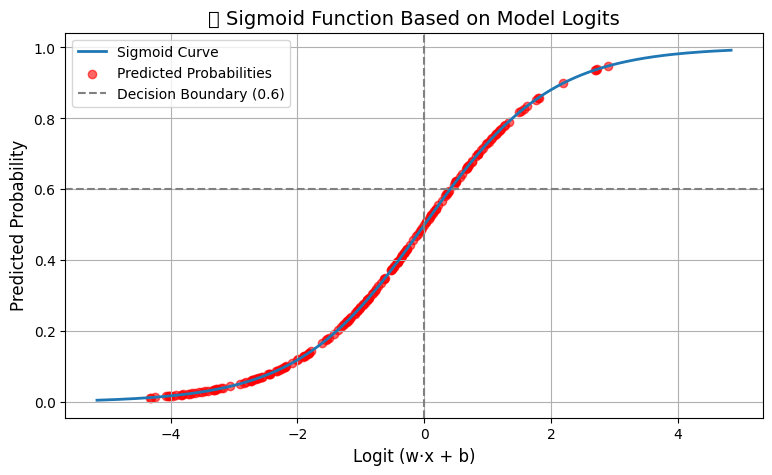


✅ Classification Report (Threshold = 0.6):
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88     41214
         1.0       0.29      0.67      0.41      4743

    accuracy                           0.80     45957
   macro avg       0.62      0.74      0.64     45957
weighted avg       0.89      0.80      0.83     45957


📊 Confusion Matrix:
[[33600  7614]
 [ 1566  3177]]


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix

# === Step 1: Prepare dataset
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 2: Manual oversampling
oversample_ratio = 1.0
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]

n_samples_to_add = int((len(y_train_0) * oversample_ratio) - len(y_train_1))
X_train_1_oversampled = X_train_1.sample(n=n_samples_to_add, replace=True, random_state=42)
y_train_1_oversampled = y_train_1.loc[X_train_1_oversampled.index]

X_train_resampled = pd.concat([X_train_0, X_train_1, X_train_1_oversampled])
y_train_resampled = pd.concat([y_train_0, y_train_1, y_train_1_oversampled])

# === Step 3: Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(
        loss='log_loss',
        learning_rate='invscaling',
        eta0=0.01,
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ))
])

pipeline.fit(X_train_resampled, y_train_resampled)

# === Step 4: Extract model components
scaler = pipeline.named_steps['scaler']
clf = pipeline.named_steps['clf']
X_test_scaled = scaler.transform(X_test)

# === Step 5: Compute logits and probabilities
logits = np.dot(X_test_scaled, clf.coef_.T) + clf.intercept_
logits = logits.ravel()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

proba_manual = sigmoid(logits)

# === Step 6: Plot sigmoid curve using real logits
plt.figure(figsize=(9, 5))
sorted_logits = np.sort(logits)
plt.plot(sorted_logits, sigmoid(sorted_logits), label="Sigmoid Curve", linewidth=2)
plt.scatter(logits[:200], proba_manual[:200], color='red', alpha=0.6, label="Predicted Probabilities")
plt.axhline(0.6, linestyle='--', color='gray', label='Decision Boundary (0.6)')
plt.axvline(0, linestyle='--', color='gray')
plt.title("📈 Sigmoid Function Based on Model Logits", fontsize=14)
plt.xlabel("Logit (w·x + b)", fontsize=12)
plt.ylabel("Predicted Probability", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# === Step 7: Evaluate on threshold
threshold = 0.6
y_pred = (proba_manual >= threshold).astype(int)

print(f"\n✅ Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Classification Report (No SMOTE, Threshold = 0.6):
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     41214
         1.0       0.65      0.04      0.08      4743

    accuracy                           0.90     45957
   macro avg       0.77      0.52      0.51     45957
weighted avg       0.87      0.90      0.86     45957


📊 Confusion Matrix:
[[41099   115]
 [ 4533   210]]


/Users/mky/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


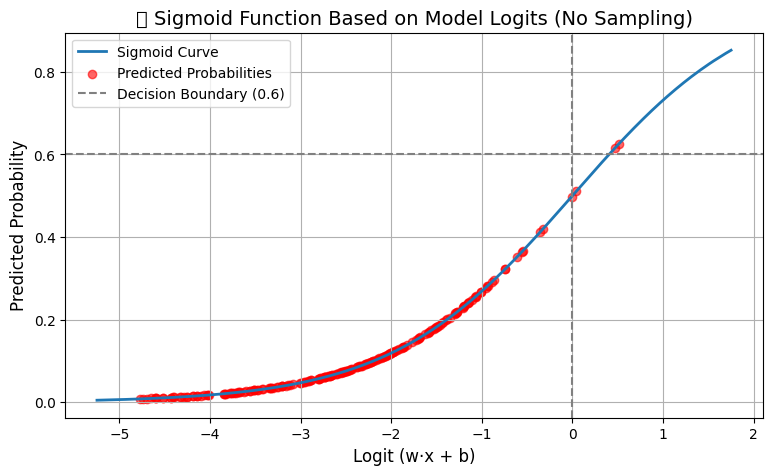

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix

# === Step 1: Prepare dataset
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 2: Train-Test Split (NO SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Build pipeline (NO OVERSAMPLING)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(
        loss='log_loss',
        learning_rate='invscaling',
        eta0=0.01,
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ))
])

# === Step 4: Train the model on imbalanced data
pipeline.fit(X_train, y_train)

# === Step 5: Get logits and sigmoid output manually
scaler = pipeline.named_steps['scaler']
clf = pipeline.named_steps['clf']
X_test_scaled = scaler.transform(X_test)
logits = np.dot(X_test_scaled, clf.coef_.T) + clf.intercept_
logits = logits.ravel()

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

proba_manual = sigmoid(logits)

# === Step 6: Predict class labels with default threshold 0.5
y_pred = (proba_manual >= 0.6).astype(int)

# === Step 7: Evaluate performance
print("✅ Classification Report (No SMOTE, Threshold = 0.6):")
print(classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 8: Plot sigmoid curve with logits and probabilities
plt.figure(figsize=(9, 5))
sorted_logits = np.sort(logits)
plt.plot(sorted_logits, sigmoid(sorted_logits), label='Sigmoid Curve', linewidth=2)
plt.scatter(logits[:200], proba_manual[:200], color='red', alpha=0.6, label='Predicted Probabilities')
plt.axhline(0.6, linestyle='--', color='gray', label='Decision Boundary (0.6)')
plt.axvline(0, linestyle='--', color='gray')
plt.title("📉 Sigmoid Function Based on Model Logits (No Sampling)", fontsize=14)
plt.xlabel("Logit (w·x + b)", fontsize=12)
plt.ylabel("Predicted Probability", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


/Users/mky/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


✅ Class distribution after SMOTE:
 HeartDiseaseorAttack
0.0    164850
1.0    164850
Name: count, dtype: int64

✅ Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     41214
         1.0       0.26      0.77      0.38      4743

    accuracy                           0.74     45957
   macro avg       0.61      0.76      0.61     45957
weighted avg       0.89      0.74      0.79     45957


📊 Confusion Matrix:
                        Predicted: 0  Predicted: 1
Actual: 0 (No Disease)         30550         10664
Actual: 1 (Disease)             1081          3662


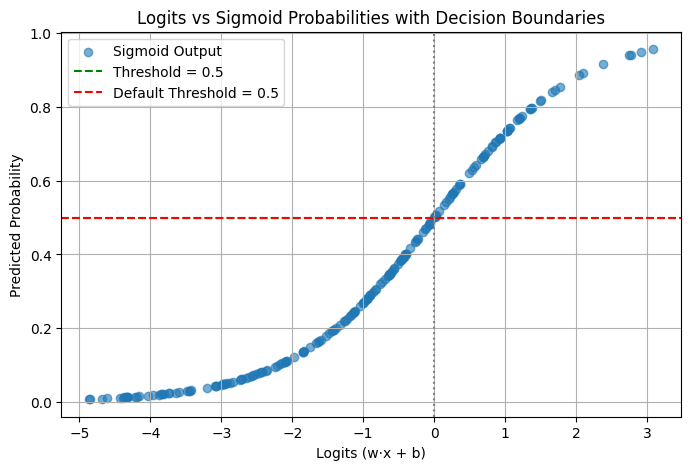

/var/folders/86/yt7z0g3j3xbds04jw0_x0sqr0000gn/T/ipykernel_62817/243216550.py:97: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/mky/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


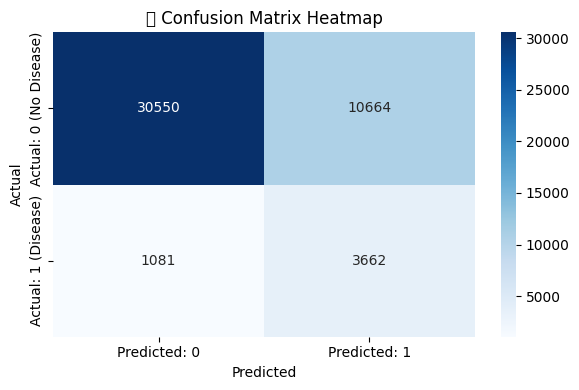

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# === Step 1: Define X and y
X = heart_disease_df_cleaned.drop(columns=["HeartDiseaseorAttack"])
y = heart_disease_df_cleaned["HeartDiseaseorAttack"]

# === Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("✅ Class distribution after SMOTE:\n", y_train_resampled.value_counts())

# === Step 4: Build pipeline (no SMOTE in it)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(
        loss='log_loss',
        learning_rate='invscaling',
        eta0=0.01,
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ))
])

# === Step 5: Fit model
pipeline.fit(X_train_resampled, y_train_resampled)

# === Step 6: Extract scaled X_test and model
scaler = pipeline.named_steps['scaler']
clf = pipeline.named_steps['clf']
X_test_scaled = scaler.transform(X_test)

# === Step 7: Compute logits manually
logits = np.dot(X_test_scaled, clf.coef_.T) + clf.intercept_
logits = logits.ravel()

# === Step 8: Apply sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

proba_manual = sigmoid(logits)

# === Step 9: Set custom decision threshold
threshold = 0.5 # You can manually adjust this
y_pred_custom = (proba_manual >= threshold).astype(int)

# === Step 10: Evaluate
print(f"\n✅ Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_custom))

# === Step 11: Labeled Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
cm_df = pd.DataFrame(
    cm,
    index=['Actual: 0 (No Disease)', 'Actual: 1 (Disease)'],
    columns=['Predicted: 0', 'Predicted: 1']
)

print("\n📊 Confusion Matrix:")
print(cm_df)

# === Step 12: Plot sigmoid curve vs logits
plt.figure(figsize=(8, 5))
plt.scatter(logits[:200], proba_manual[:200], alpha=0.6, label='Sigmoid Output')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.axhline(y=0.5, color='red', linestyle='--', label='Default Threshold = 0.5')
plt.axvline(x=0, color='gray', linestyle=':')
plt.title("Logits vs Sigmoid Probabilities with Decision Boundaries")
plt.xlabel("Logits (w·x + b)")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True)
plt.show()

# === Step 13: Heatmap of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("📊 Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()
